In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Kannada-MNIST/sample_submission.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/test.csv


# DATA EXPLORATION

libraries used are numpy, pandas, matplotlib, seaborn(more expressive way of graphs).

First we read the dataset(different functions are available depending on the data) suppose we cqa take read_csv()

As the name suggests we have to explore the given data. use funtions like describe() to know the data in that dataframe. sorting of the attributes is essential. we then have to find the null values and the duplicate values if present can also plot the data for better representation , group the values and can also split them according to our convinience.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D,LeakyReLU
from tensorflow.keras.optimizers import RMSprop,Adam,Adadelta
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.regularizers import l2

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

df=pd.read_csv('../input/Kannada-MNIST/train.csv')
print(df)
df.describe()

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          0       0       0       0       0       0       0       0       0   
1          1       0       0       0       0       0       0       0       0   
2          2       0       0       0       0       0       0       0       0   
3          3       0       0       0       0       0       0       0       0   
4          4       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      5       0       0       0       0       0       0       0       0   
59996      6       0       0       0       0       0       0       0       0   
59997      7       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.008817,0.029467,0.037767,0.075933,...,0.015583,0.016450,0.013417,0.022300,0.012217,0.001383,0.003783,0.0,0.002717,0.0
std,2.872305,0.0,0.0,0.0,0.0,0.0,1.474271,2.700491,2.726371,3.993023,...,1.443852,1.958914,1.342572,2.051846,1.730959,0.338846,0.926724,0.0,0.665445,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,157.000000,255.000000,255.000000,83.000000,227.000000,0.0,163.000000,0.0


# Checking the input image

the input is given in pixel values format, we have to convert it into an image.

we take the csv input convert it into a numpy array and the reshape it into a two dimentional array (img are 2d arrays).and then use opencv or matplotlib to plot the array into an image.(and also save it if we like to)

<class 'pandas.core.frame.DataFrame'>


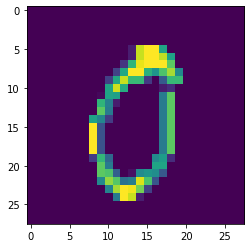

In [4]:
df0=df.iloc[:1,1:]
print(type(df0))
img = np.reshape(np.asarray(df0), (28, 28))
cv2.imwrite('image0.png',img)
plt.imshow(img)
plt.show()

In [5]:
x=df["label"].value_counts()
print(x)

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64


In [6]:
df.value_counts('pixel776')

pixel776
0      59992
6          1
16         1
67         1
119        1
142        1
148        1
150        1
157        1
dtype: int64

# Finding sum of NULL data


In [7]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

# Finding sum of duplicated data

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(60000, 785)

# Class distibution
using seaborn instead of matplotlib

<AxesSubplot:ylabel='label'>

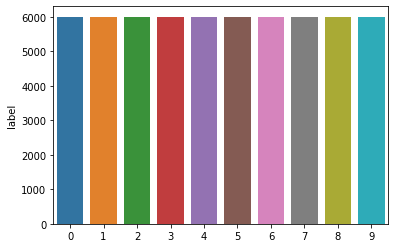

In [10]:
# df0=df.iloc[:1,:]
import seaborn as sns
# print(df0)
sns.barplot(x.index,x)

# Data preprocessing
**Datasets**

training sets- the dataset from which we use to fit the model.other terms model learns from this data.

validation sets- a small part of data used to improve the quality of the model in simple terms,like it improves the hyperparameters.model wont learn fromt his dataset.(also called dev set , development set)

training set- a fraction of data compared to training set. it is used to know how the model is performing.(test the fit of the model),is unbiased.

**Data preparation**

declaring training and testing variables.....and can also normalise them

In [11]:
raw_train=pd.read_csv('../input/Kannada-MNIST/train.csv')
# raw_test=pd.read_csv('../input/Kannada-MNIST/test.csv')

In [12]:
x=raw_train.iloc[:,1:]/255
y=raw_train.iloc[:,0]

In [13]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
x_train.shape

(42000, 784)

# Reshape the data
the data given here is in the form of (42000,784) but the image size to be taken is 28x28

In [15]:
x_train=x_train.values.reshape(-1,28,28,1)
x_val=x_val.values.reshape(-1,28,28,1)
y_train=to_categorical(y_train)#the labels will be in the same fromat as the reshaped x_train 
y_val=to_categorical(y_val)

In [16]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(momentum=.15),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(momentum=.15),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(momentum=.15),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10,activation="softmax") 
    
])


2022-12-08 03:45:41.560281: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        1

In [18]:
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer,loss=['categorical_crossentropy'],metrics=['accuracy'])

In [19]:
x_train.shape

(42000, 28, 28, 1)

In [20]:
epochs=5
batch_size=64
history=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_val,y_val))

2022-12-08 03:45:41.999243: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1313/1313 [==============================] - 120s 90ms/step - loss: 0.1729 - accuracy: 0.9469 - val_loss: 0.0562 - val_accuracy: 0.9858
Epoch 2/5
1313/1313 [==============================] - 119s 91ms/step - loss: 0.0485 - accuracy: 0.9860 - val_loss: 0.0266 - val_accuracy: 0.9928
Epoch 3/5
1313/1313 [==============================] - 119s 91ms/step - loss: 0.0370 - accuracy: 0.9893 - val_loss: 0.0285 - val_accuracy: 0.9927
Epoch 4/5
1313/1313 [==============================] - 118s 90ms/step - loss: 0.0306 - accuracy: 0.9911 - val_loss: 0.0582 - val_accuracy: 0.9849
Epoch 5/5
1313/1313 [==============================] - 119s 90ms/step - loss: 0.0291 - accuracy: 0.9917 - val_loss: 0.0293 - val_accuracy: 0.9924


In [21]:
# print(raw_test)
# test=raw_test
test=pd.read_csv('../input/Kannada-MNIST/test.csv')
test1=test.iloc[2:3,1:]
print(test1)

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
2       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
2       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
2         0         0         0         0  

[1 rows x 784 columns]


In [22]:
# test_id=test.id

test=test.drop(['id'],axis=1)/255
test=test.values.reshape(-1,28,28,1)

In [23]:
test.shape

(5000, 28, 28, 1)

# Prediction
Save onto a csv file

In [24]:
Yp=model.predict(test)
Yp=np.argmax(Yp,axis=1)
print(Yp)
model.save('model1.h5')
# Yp.head()
# sample_sub['label']=Yp
# sample_sub.to_csv('submission.csv',index=False)
# sample_sub.head()
# np.savetxt('submission.csv',Yp.astype('int32'),delimiter=',')

[3 0 2 ... 1 6 3]


In [25]:
sample_sub=pd.read_csv('../input/Kannada-MNIST/sample_submission.csv')
sample_sub['label']=Yp
sample_sub.to_csv('submission.csv',index=False)

In [26]:
sample_sub

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
...,...,...
4995,4995,1
4996,4996,1
4997,4997,1
4998,4998,6


In [27]:
test.shape

(5000, 28, 28, 1)

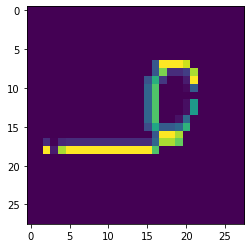

In [28]:
#         print(i)
img = np.reshape(np.asarray(test1), (28, 28))
#     cv2.imwrite('image0.png',img)
plt.imshow(img)
plt.show()

# Confusion matrix
   Gives the performance of the matrix,has two dimensions predictions and actual

it basically shows the wrong prediction and the right prediction, also know as error matrix.

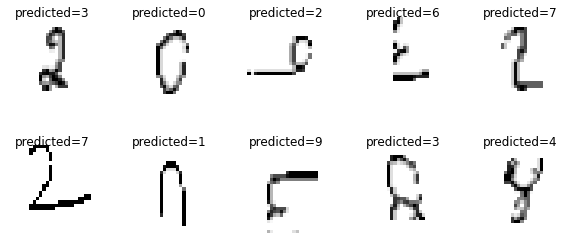

In [29]:
plt.figure(figsize=(10,5))
for i in range(10):  
    plt.subplot(2,5, i+1)
    plt.imshow(test[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title("predicted=%d" % Yp[i],y=0.9)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()

In [30]:
Yp2=model.predict(x_val)
Yp2=np.argmax(Yp2,axis=1)
Yp1=np.argmax(y_val,axis=1)
# print(test0)
Cmtx=confusion_matrix(Yp1,Yp2)
Cmtx=pd.DataFrame(Cmtx,index=range(0,10),columns=range(0,10))
Cmtx

,0,1,2,3,4,5,6,7,8,9
0,1765,15,0,0,0,0,0,0,5,0
1,2,1831,0,0,0,0,0,0,0,1
2,3,0,1828,1,0,1,0,0,0,0
3,3,0,1,1775,0,2,0,4,0,0
4,0,0,0,4,1778,9,0,0,16,2
5,0,0,0,3,2,1765,0,0,0,0
6,0,0,0,0,0,0,1756,3,0,24
7,0,0,1,18,0,0,4,1818,0,1
8,0,0,0,0,0,0,0,0,1774,1
9,0,0,0,0,0,0,7,2,1,1774


In [31]:
print(test.shape)

(5000, 28, 28, 1)
